In [17]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.graphics.gofplots as sm
import matplotlib.pyplot as plt
from scipy import stats

In [18]:
data = pd.read_csv('deflection.csv', sep=';', header=0)

In [19]:
model = ols('Deflection ~ Load', data=data)
res = model.fit()
res.summary()

data['Load2'] = data['Load']**2
model = ols('Deflection ~ Load + Load2', data=data)
res = model.fit()

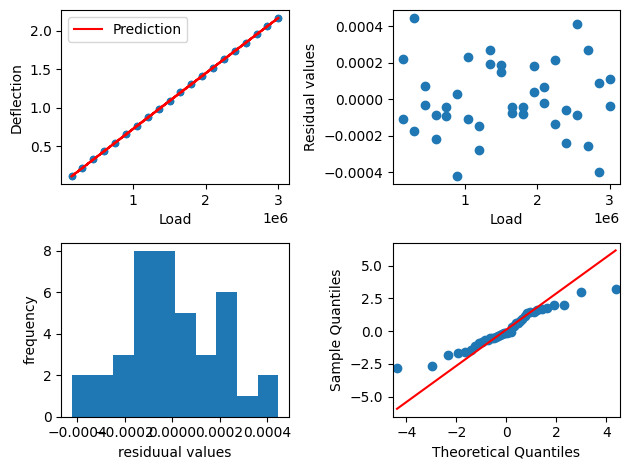

In [21]:
fig, axs = plt.subplots(2,2, squeeze=False)
data['Prediction'] = res.predict(data)
plt.tight_layout()

ax = data.plot.scatter(x='Load',y='Deflection', ax=axs[0,0])
data.plot(x='Load',y='Prediction', ax=axs[0,0], color='red')
# plt.subplot(2,2,2)
residuals = res.predict(data)-data['Deflection']
axs[0,1].scatter(data['Load'], (residuals))
axs[0,1].set_xlabel('Load')
axs[0,1].set_ylabel('Residual values')

axs[1,0].hist(residuals)
axs[1,0].set_ylabel('frequency')
axs[1,0].set_xlabel('residuual values')
plt.subplot(2,2,4)
sm.qqplot(residuals, stats.t, distargs=(4,), loc=3, scale=10, fit=True, ax=axs[1,1], line='s')
plt.tight_layout()